<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%B9%E3%82%AF%E3%83%A9%E3%83%83%E3%83%81%E5%85%A5%E9%96%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.このSprintについて

**Sprintの目的**

・機械学習スクラッチの準備をする


**どのように学ぶか**

今後の学習でスクラッチで実装する機械学習プログラムを、まずは scikit-learn を用いて実装します。

# 2.スクラッチとは

NumPy などに備わっている基本的なライブラリを組み合わせることで、scikit-learn などの応用的なライブラリに実装されている機能と等価なクラス・関数を自作することができます。これをスクラッチと呼びます。


スクラッチを通して、scikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねていますが、それは主な目的ではありません。


以下のような効果を狙っています。



・新たな手法に出会った時に理論・数式を理解しやすくする


・ライブラリを使う上での曖昧さを減らす


・既存の実装を読みやすくする

今回はまず、機械学習のプログラムを完全にはスクラッチせず、scikit-learn を用いて実装します。そして、次回から段階的に scikit-learn を用いた実装をスクラッチに移行していきます。




【問題1】train_test_split のスクラッチ

まずは、scikit-learnの train_test_split をスクラッチしてみます。以下の雛形をベースに関数を実装してください。


sklearn.model_selection.train_test_split - scikit-learn stable version documentation


なお、作成した関数がscikit-learnの train_test_split と同じ動作をするか必ず確認をしましょう。




In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 雛形
def scratch_train_test_split(X, y, train_size=0.8):
    """検証データを分割する。
    Parameters
    ----------
    X : ndarray
      訓練データ (n_samples, n_features)
    y : ndarray
      正解値 (n_samples,)
    train_size : float
      何割をtrainとするか指定 (0 < train_size < 1)
    Returns
    -------
    X_train : ndarray
      訓練データ (n_samples, n_features)
    X_test : ndarray
      検証データ (n_samples, n_features)
    y_train : ndarray
      訓練データの正解値 (n_samples,)
    y_test : ndarray
      検証データの正解値 (n_samples,)
    """
    # ここにコードを書く
    pass
    return X_train, X_test, y_train, y_test

In [2]:
def scratch_train_test_split(X, y, train_size=0.8):
    """検証データを分割する。
    Parameters
    ----------
    X : ndarray
      訓練データ (n_samples, n_features)
    y : ndarray
      正解値 (n_samples,)
    train_size : float
      何割をtrainとするか指定 (0 < train_size < 1)
    Returns
    -------
    X_train : ndarray
      訓練データ (n_samples, n_features)
    X_test : ndarray
      検証データ (n_samples, n_features)
    y_train : ndarray
      訓練データの正解値 (n_samples,)
    y_test : ndarray
      検証データの正解値 (n_samples,)
    """
    # trainのサンプル数を算出
    n_train = np.floor(X.shape[0] * train_size).astype(int)   #切り捨て
   
    # インデックスの並び順をランダムに生成し、Trainの割合でインデックスを決定する
    rng = np.random.default_rng()
    idx_random = rng.permutation(X.shape[0])
    idx_train = idx_random[:n_train]
    idx_test = idx_random[n_train:]
    
    X_train = X[idx_train]
    X_test = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    
    return X_train, X_test, y_train, y_test

In [3]:
# スクラッチの場合
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

df_X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_y = pd.DataFrame(data=iris.target, columns=['Species'])

X_train, X_test, y_train, y_test = scratch_train_test_split(df_X.values, df_y.values)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_test)

(120, 4) (30, 4) (120, 1) (30, 1)
[[0]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [0]
 [2]
 [1]
 [2]
 [1]
 [0]
 [0]
 [0]
 [2]
 [2]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [2]
 [1]]


In [4]:
# scikit-learnの場合
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X.values, df_y.values, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_test)

(120, 4) (30, 4) (120, 1) (30, 1)
[[2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2]
 [2]
 [0]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]


∴上記のとおり、スクラッチで作成した関数がscikit-learnの train_test_split と同じ動作をする旨を確認できた。

# 3.scikit-learnを用いて機械学習を行うコードの実装

scikit-learnを使ったコードを実装しベースラインモデルを作成していきます。


検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。

**分類問題**

分類は3種類の手法をscikit-learnを使って実装します。


・ロジスティック回帰

・SVM

・決定木

scikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数でloss=”log”とすることでロジスティック回帰の計算になります。


scikit-learn にはロジスティック回帰に使える分類器として LogisticRegression クラスと SGDClassifier クラスが用意されています。ここでは勾配降下法を用いて計算する SGDClassifier クラスを用います。引数で loss="log" を指定することでロジスティック回帰の計算ができます。


sklearn.linear_model.SGDClassifier — scikit-learn 0.21.3 documentation
sklearn.svm.SVC — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation

3種類のデータセットを用いて動作を確認します。


1つ目は事前学習期間同様のirisデータセットです。


sklearn.datasets.load_iris - scikit-learn stable version documentation


2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類すべて使います。


virgicolorとvirginica

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。



In [10]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [8]:
# irisデータセット
df_X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Species列の値を分かりやすいようにアヤメの種類に置き換える
# series1 = pd.Series(data=[iris.target_names[i] for i in iris.target], name="Species")
df_y = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([df_X,df_y], axis=1)

df_iris = df[df.Species != 0]
X_iris = df_iris.iloc[:, :-1]
y_iris = df_iris.iloc[:, -1]

print(X_iris.shape, y_iris.shape)

(100, 4) (100,)


In [22]:
# シンプルデータセット1作成コード
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X1 = np.concatenate([f0, f1])
y1 = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

In [23]:
# シンプルデータセット2作成コード
X2 = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


**【問題2】 分類問題を解くコードの作成**

上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

**回帰問題**

次に回帰は1種類をscikit-learnを使って実装します。


・線形回帰


線形回帰は勾配降下法を用いて計算する SGDRegressor クラスを利用してください。


sklearn.linear_model.SGDRegressor - scikit-lear stable version documentation


データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。


House Prices: Advanced Regression Techniques


train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。



In [19]:
def evaluate_classifiers(X, y, train_size=0.7):
    '''
    ロジスティック回帰、SVM、決定木モデルで学習、推定、評価を実行する関数
    Parameters
    ----------
    X : ndarray
      訓練データ (n_samples, n_features)
    y : ndarray
      正解値 (n_samples,)
    train_size : float
      何割をtrainとするか指定 (0 < train_size < 1)
    Returns
    -------
    なし
    '''
    from sklearn.linear_model import SGDClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report

    # 訓練データと検証データの分割
    X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=train_size)

    #####################################################
    # ロジスティック回帰
    #####################################################
    pipe1 = Pipeline([("scaler", StandardScaler()),
                      ("SGD", SGDClassifier(loss="log"))])

    pipe1.fit(X_train, y_train)  # 学習
    y_pred1 = pipe1.predict(X_test)  # 推論

    print("----------Logistic Regression-------------")
    print(classification_report(y_test, y_pred1))

    #####################################################
    # SVM
    #####################################################
    pipe2 = Pipeline([("scaler", StandardScaler()),
                      ("svc", SVC())])

    pipe2.fit(X_train, y_train)  # 学習
    y_pred2 = pipe2.predict(X_test)  # 推論

    print("----------SVM-------------")
    print(classification_report(y_test, y_pred2))

    #####################################################
    # 決定木
    #####################################################
    pipe3 = Pipeline([("scaler", StandardScaler()),
                      ("tree", DecisionTreeClassifier())])

    pipe3.fit(X_train, y_train)  # 学習
    y_pred3 = pipe3.predict(X_test)  # 推論

    print("----------Decision Tree-------------")
    print(classification_report(y_test, y_pred3))


In [20]:
# irisデータセットの場合
evaluate_classifiers(X_iris.values, y_iris.values)

----------Logistic Regression-------------
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       0.89      0.89      0.89        18

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30

----------SVM-------------
              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       0.89      0.94      0.92        18

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

----------Decision Tree-------------
              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       0.89      0.94      0.92        18

    accuracy                           0.90        30
   macro avg       0.

In [24]:
# シンプルデータセット1
evaluate_classifiers(X1, y1)

----------Logistic Regression-------------
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

----------SVM-------------
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

----------Decision Tree-------------
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99        75
           1       0.99      1.00      0.99        75

    accuracy                           0.99       150
   macro avg       0.

In [25]:
# シンプルデータセット2
evaluate_classifiers(X2, y2)

----------Logistic Regression-------------
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

----------SVM-------------
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

----------Decision Tree-------------
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.57      0.67      0.62         6

    accuracy                           0.58        12
   macro avg       0.

【問題3】 回帰問題を解くコードの作成

線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。


In [26]:
# 必要なライブラリのインポート
import pandas as pd

In [44]:
%pwd

'/content/sample_data'

In [51]:
%cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
%ls

In [53]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
X = df[['GrLivArea', 'YearBuilt']].values
y = df['SalePrice'].values

X

array([[1710, 2003],
       [1262, 1976],
       [1786, 2001],
       ...,
       [2340, 1941],
       [1078, 1950],
       [1256, 1965]])

In [54]:
# 必要なライブラリのインポート
from sklearn.linear_model import SGDRegressor

In [55]:
# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.7)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

regr = SGDRegressor(loss='squared_loss',penalty='l2',alpha=0.01,max_iter=1000)
regr.fit(X_train_std, y_train)
y_pred = regr.predict(X_test_std)

print("Intercept:", regr.intercept_)
print("Coefficients: ", regr.coef_)

print(X_test_std.shape)

Intercept: [180487.78098939]
Coefficients:  [47108.29759197 31223.8503895 ]
(439, 2)


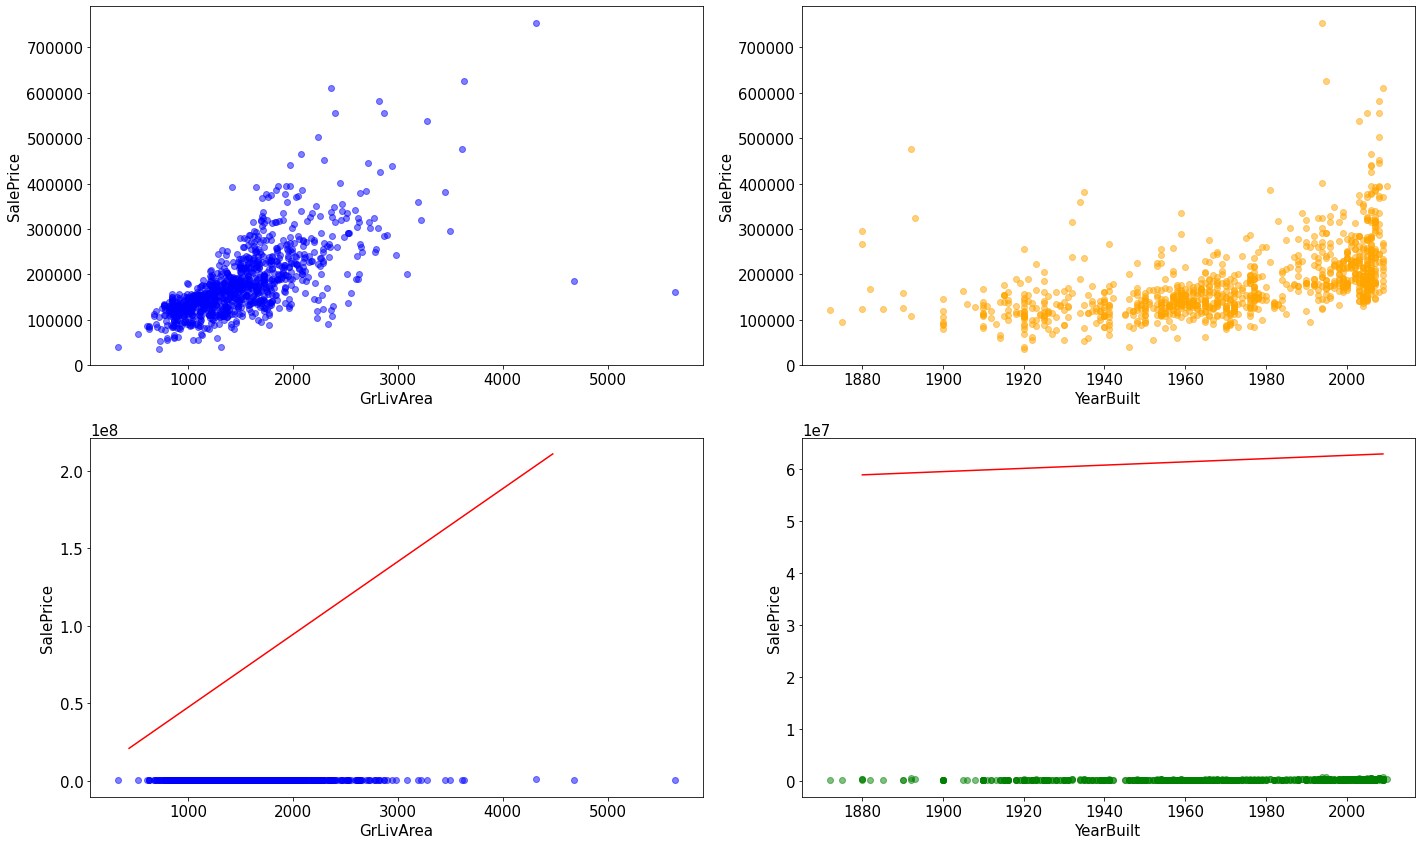

In [57]:
# 散布図
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(2, 2, 1)   #1行２列の１番目
ax1.set_xlabel('GrLivArea')
ax1.set_ylabel('SalePrice')
ax1.scatter(X_train[:, 0], y_train, color = 'blue', alpha=0.5, label = 'GrLivArea') 

ax2 = fig.add_subplot(2, 2, 2)   #１行２列の２番目
ax2.set_xlabel('YearBuilt')
ax2.set_ylabel('SalePrice')
ax2.scatter(X_train[:, 1], y_train, color = 'orange', alpha=0.5, label = 'YearBuilt') 

ax3 = fig.add_subplot(2, 2, 3)   #２行２列の１番目
ax3.set_xlabel('GrLivArea')
ax3.set_ylabel('SalePrice')
ax3.scatter(X_train[:, 0], y_train, color = 'blue', alpha=0.5, label = 'GrLivArea') 
ax3.plot(np.sort(X_test[:, 0]), regr.intercept_+regr.coef_[0]*np.sort(X_test[:, 0]), color = 'red')

ax4 = fig.add_subplot(2, 2, 4)   #２行２列の２番目
ax4.set_xlabel('YearBuilt')
ax4.set_ylabel('SalePrice')
ax4.scatter(X_train[:, 1], y_train, color = 'green', alpha=0.5, label = 'YearBuilt') 
ax4.plot(np.sort(X_test[:, 1]), regr.intercept_+regr.coef_[1]*np.sort(X_test[:, 1]), color = 'red')

plt.tight_layout()
plt.show()